## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [1]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений
from google.colab import files
from keras.preprocessing import image

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline

In [2]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Вывод формы данных для обучения
x_train_org.shape

(60000, 28, 28)

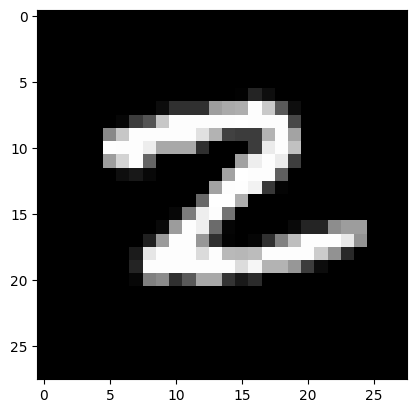

In [4]:
# Номер картинки
n = 143

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [5]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [6]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [7]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

In [8]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [9]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [10]:
# Вывод примера одного выходного вектора
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [12]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 500 нейронов с relu-активацией
model.add(Dense(500, input_dim=784, activation='relu'))

# Добавление полносвязного слоя на 200 нейронов с relu-активацией
model.add(Dense(200, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

In [13]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 494710 (1.89 MB)
Trainable params: 494710 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
# Обучение модели
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
469/469 [==============================] - 10s 12ms/step - loss: 0.2313 - accuracy: 0.9316 - val_loss: 0.1082 - val_accuracy: 0.9667
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0847 - accuracy: 0.9739 - val_loss: 0.0728 - val_accuracy: 0.9763
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0533 - accuracy: 0.9836 - val_loss: 0.0667 - val_accuracy: 0.9774
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0662 - val_accuracy: 0.9798
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0703 - val_accuracy: 0.9796
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0612 - val_accuracy: 0.9813
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0676 - val_accuracy: 0.9815
Epo

In [15]:
model.save_weights('model.h5')
model.load_weights('model.h5')

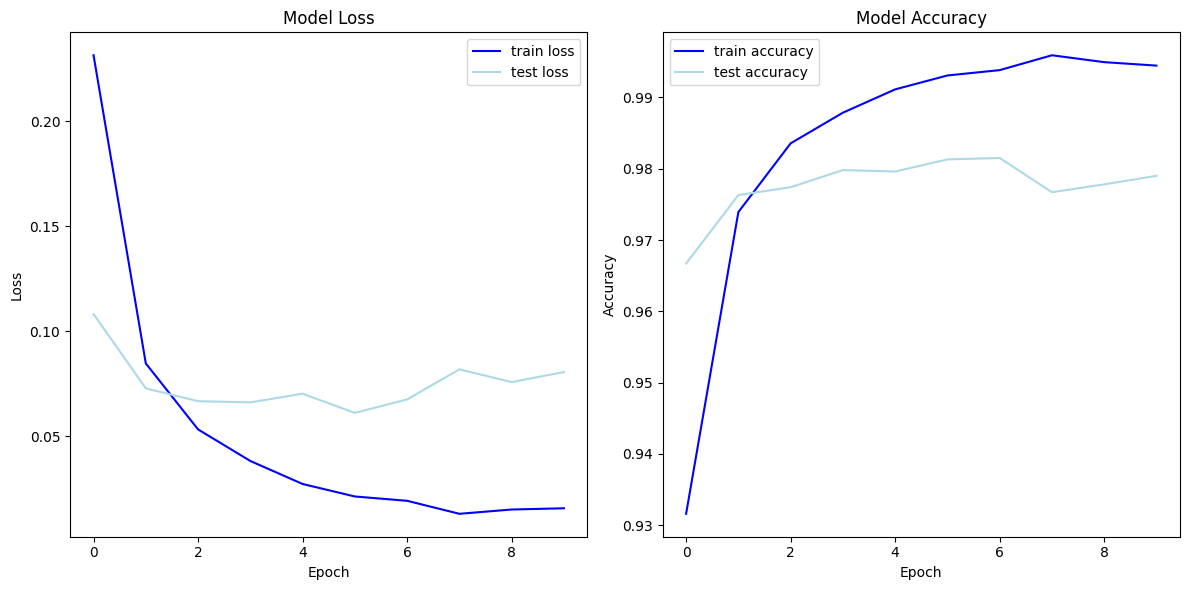

In [16]:
# Графики для обычной модели
plt.figure(figsize=(12, 6))

# График для loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss', color='blue')
plt.plot(history.history['val_loss'], label='test loss', color='lightblue')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='test accuracy', color='lightblue')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


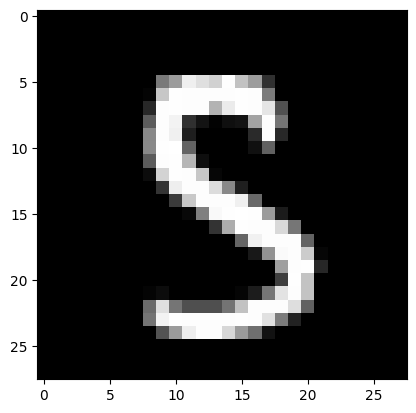

In [17]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [18]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(784,)


In [19]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [20]:
# Распознавание примера
prediction = model.predict(x)

1/1 [==============================] - 0s 92ms/step


In [21]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[2.2415238e-18 9.4241131e-17 3.2462826e-16 5.0017275e-07 1.4233870e-14
  9.9999797e-01 7.3832331e-16 1.6226361e-16 4.6924723e-07 1.0378982e-06]]


In [22]:
sum(prediction[0])

0.999999980760252

In [23]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 5


In [24]:
# Вывод правильного ответа для сравнения
print(y_test_org[n_rec])

5


# мои цифры

In [25]:
# Загрузка изображений с локального компьютера
uploaded = files.upload()

# Получение пути к загруженным изображениям
image_paths = list(uploaded.keys())

# Загрузка изображений
images = [image.load_img(image_path, target_size=(28, 28), color_mode='grayscale') for image_path in image_paths]


Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg


Размер массива numpy: (28, 28, 1)


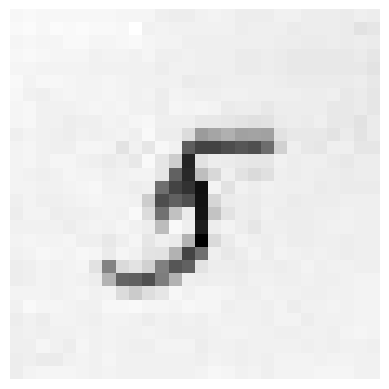

In [41]:
# Выбор случайного индекса изображения
random_index = np.random.randint(0, len(images))

# Выбор случайного изображения
random_img = images[random_index]

# Преобразование изображения в массив
img_array = image.img_to_array(random_img)

print("Размер массива numpy:", img_array.shape)

# Отображение изображения
plt.imshow(img_array, cmap='gray')  # Squeeze используется для удаления измерения с размером 1
plt.axis('off')
plt.show()

Размер массива после инверсии: (28, 28, 1)


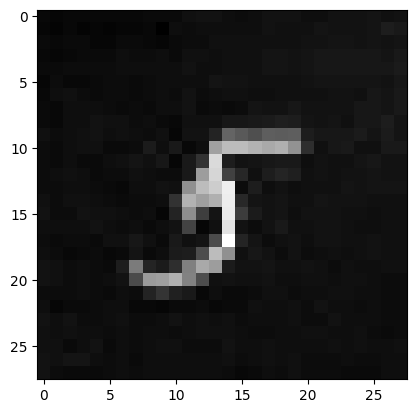

Размер массива после преобразования в одномерный массив: (1, 784) 

Размер массива после нормализации: (1, 784) 

1/1 [==============================] - 0s 19ms/step
Распознана цифра: 8


In [42]:
# Инверсия цветов
img_array = 255 - img_array
print("Размер массива после инверсии:", img_array.shape)

plt.imshow(img_array, cmap='gray')
plt.show()

# Изменяем форму массива на одномерный массив
reshaped_img_array = img_array.reshape((1, 784))
print("Размер массива после преобразования в одномерный массив:", reshaped_img_array.shape, "\n")

# Нормализация значений пикселей к диапазону [0, 1]
normalized_img_array = reshaped_img_array.astype('float32') / 255.
# Вывод размера массива после нормализации
print("Размер массива после нормализации:", reshaped_img_array.shape, "\n")

my_prediction = model.predict(normalized_img_array)
my_pred = np.argmax(my_prediction)

print(f'Распознана цифра: {my_pred}')